# Data Preparation

### Data Preprocessing
1. Formatting: Format the dataset as per your requirement.
    * May be you need to change the data from Json to Tabular Format
    * May be it is not suitable for your alogirthm's requirement.
    * May be you had collected data from multiple sources.
    * Depending upon the requirement you can do it before or after Data Identification phase. 
    
2. Cleaning:
    * Fix missing data or remove outliers.
    * May be some extra columns are there, which might not be suitable for your requirement.
    * You might also have to remove sensitive information and identity fields from your data.

3. Sampling:
    * More data can result in longer execution times for model and more memory requirements.
    * Take a sample from your data for faster exploration and solution prototyping.
    * Creating Test and Training dataset.


## Identifying Outliers

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# import data
# Please  provide the right path here.
dataset = pd.read_csv("pima_indian_diabetes.csv")  
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
pima_dataset = dataset.iloc[:, :8]

In [ ]:
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


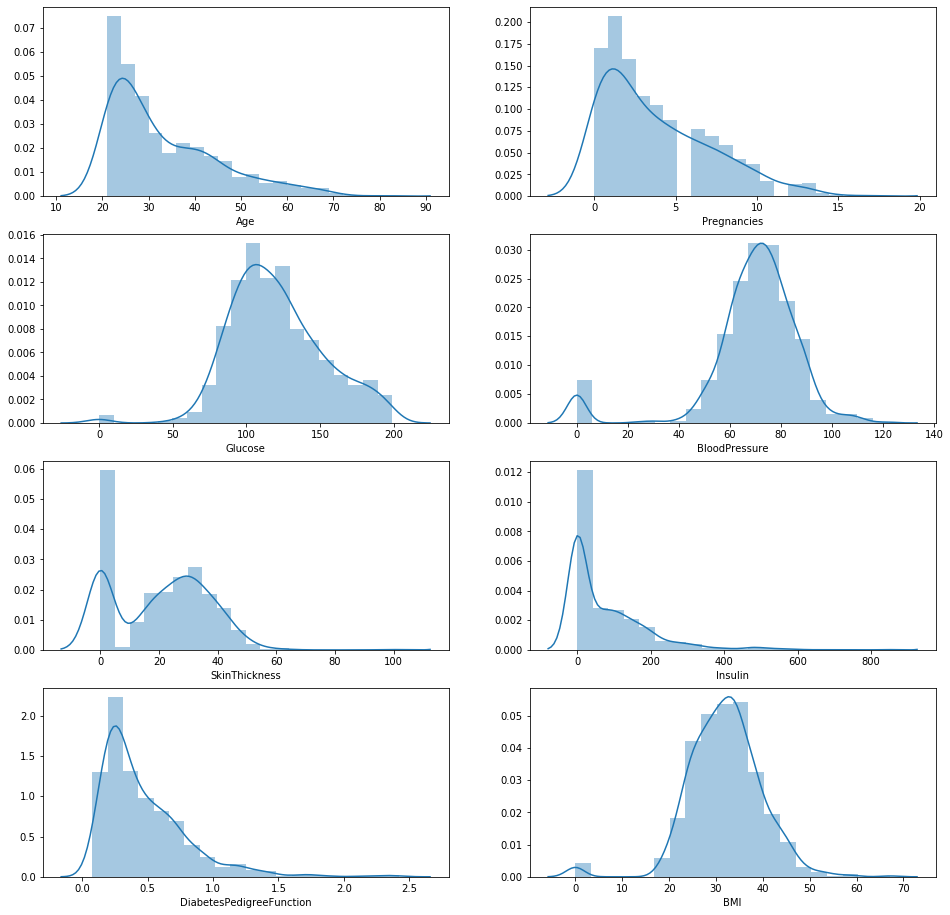

In [124]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(pima_dataset.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(pima_dataset.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(pima_dataset.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(pima_dataset.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(pima_dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(pima_dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(pima_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(pima_dataset.BMI, bins = 20, ax=ax[3,1])

In [125]:
(pima_dataset == 0).astype(int).sum(axis = 0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [126]:
dataset.shape

(768, 9)

### Missing values
##### We have to treat GLucose BP, BMI.
##### We have to check what we should do with Pregnancies, SkintThickness and Insulin

### Outlier Detection
* You can use Box Plot, Histogram, Statstical methods like z-test.

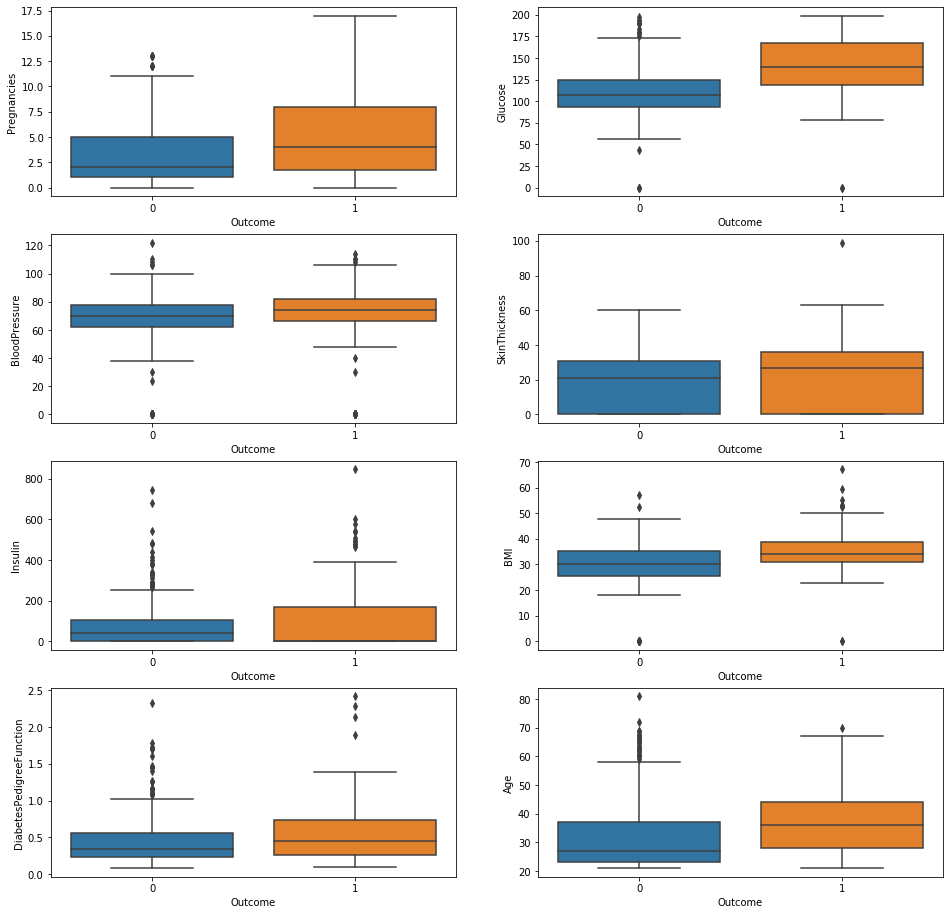

In [89]:
columns = list(dataset.columns)[:-1]
fig, ax = plt.subplots(4,2, figsize=(16,16))

for idx, col in enumerate(columns):
    sns.boxplot(data = dataset, x = 'Outcome', y = col, ax=ax[idx//2, idx % 2])
plt.show()

##### Outlier detection for 2 variables

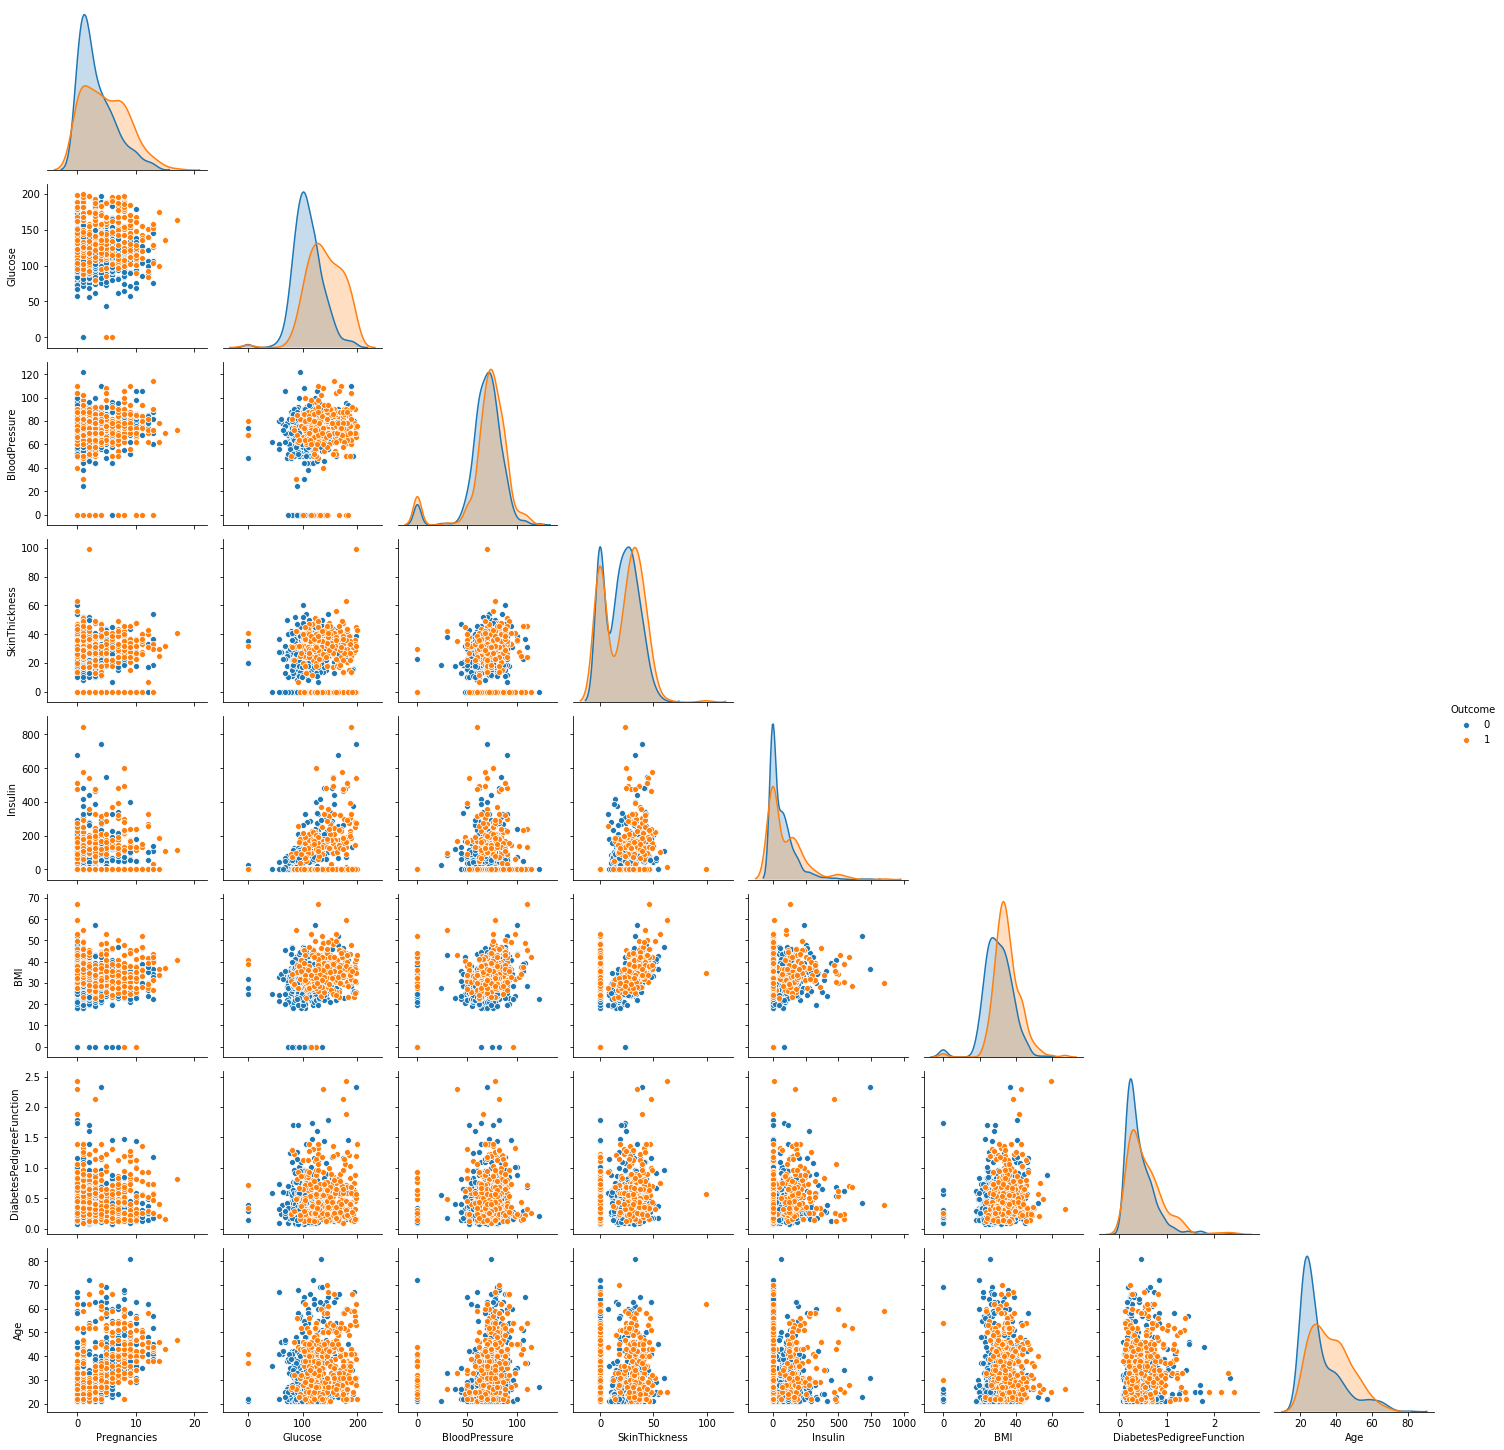

In [107]:
sns.pairplot(data=dataset , hue='Outcome', corner=True)

In [ ]:
sns.pairplot(data=pima_dataset)  # , hue='Outcome')

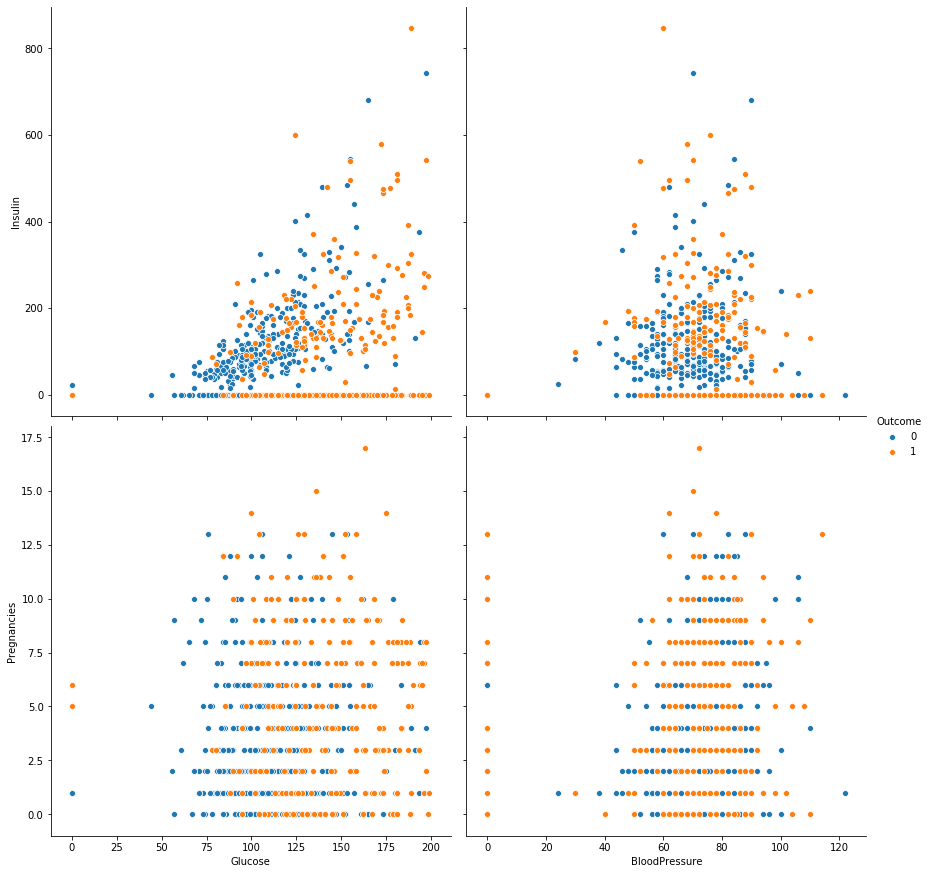

In [120]:
figsize=(16,16)
sns.pairplot(data = dataset, hue= 'Outcome', x_vars=['Glucose', 'BloodPressure'], y_vars=['Insulin', 'Pregnancies'], height=6)

In [127]:
corr = pima_dataset.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


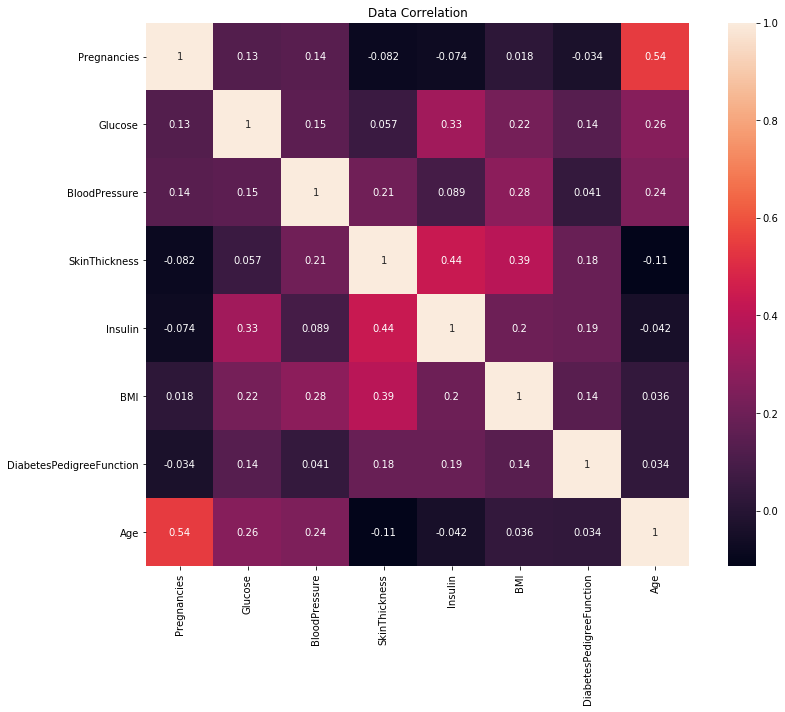

In [128]:
plt.figure(figsize=(14, 10))
plt.title('Data Correlation')
sns.heatmap(corr, annot=True, square = True)

A  B  C
1  2  class A
1  3  Class A
1  4  Class B

A  B class A  Class B
1  2  1        0
1  3  1        0
1  4  0        1

dummy variable (n-1)
A  B  Class A
1  2   1
1  3   1
1  4   0
    


corr = Cov(X,Y) / VAr(X) * VAr(Y) -1 1

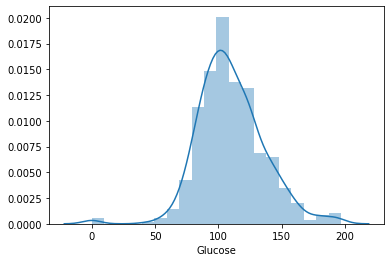

In [129]:
sns.distplot(dataset.Glucose[dataset['Outcome']==0], bins = 20)

In [ ]:
standardisation:
    Minmaxsaclar
    Robust scalar
    Standardiser